In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
scaler = StandardScaler()

In [9]:
X = data.values # Accessing all the columns using values for PCA and scaling
X_scaled = scaler.fit_transform(X)

In [4]:
X= data.drop('quality',axis=1)
y= data['quality']

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [11]:
pca= PCA()
X_pca = pca.fit_transform(X_scaled)

In [12]:
#Explain variance ratio of data
explained_variance = pca.explained_variance_ratio_
print("explained_variance_ratio:", explained_variance)

explained_variance_ratio: [0.25192323 0.17625364 0.13093072 0.09354943 0.0744819  0.07123151
 0.04827287 0.04294517 0.0375559  0.03132014 0.0238955  0.01317823
 0.00446177]


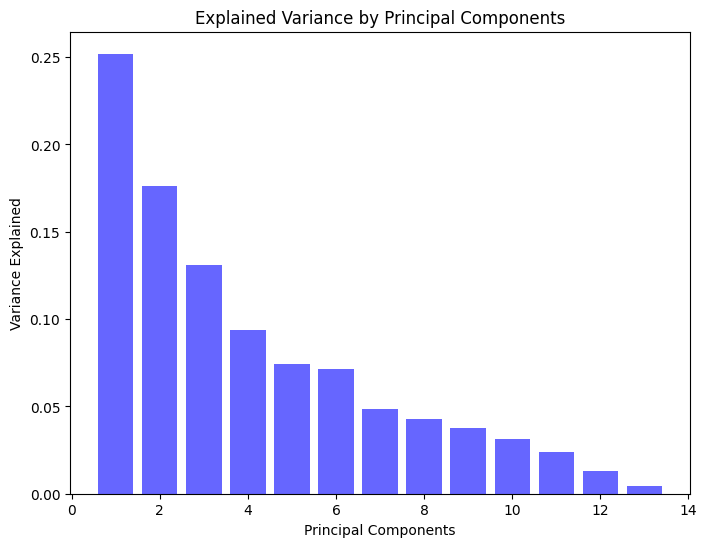

In [13]:
# Step 4: Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

In [14]:
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.25192323 0.42817687 0.55910759 0.65265701 0.72713891 0.79837043
 0.8466433  0.88958847 0.92714436 0.9584645  0.98236    0.99553823
 1.        ]


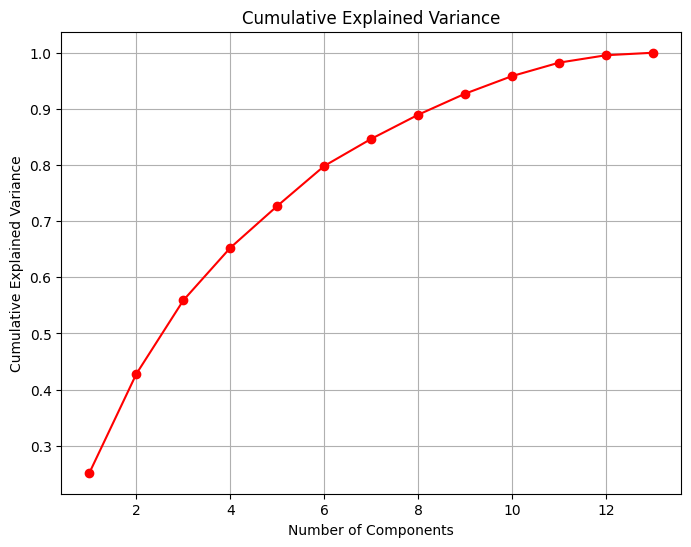

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [16]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

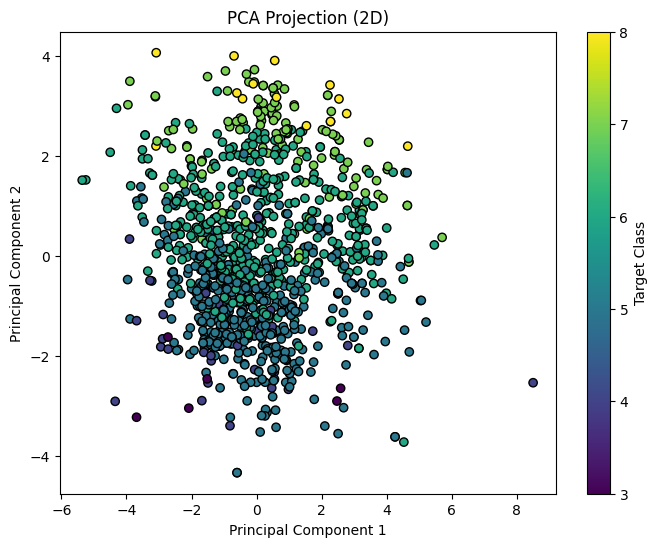

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2D)')
plt.colorbar(label='Target Class')
plt.show()